# **Data Collection & Dataset Structure**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/healthcare_dataset.csv")

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48501 entries, 0 to 48500
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                48501 non-null  object 
 1   Age                 48501 non-null  int64  
 2   Gender              48501 non-null  object 
 3   Blood Type          48501 non-null  object 
 4   Medical Condition   48501 non-null  object 
 5   Date of Admission   48501 non-null  object 
 6   Doctor              48501 non-null  object 
 7   Hospital            48500 non-null  object 
 8   Insurance Provider  48500 non-null  object 
 9   Billing Amount      48500 non-null  float64
 10  Room Number         48500 non-null  float64
 11  Admission Type      48500 non-null  object 
 12  Discharge Date      48500 non-null  object 
 13  Medication          48500 non-null  object 
 14  Test Results        48500 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 5.6

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,1
Insurance Provider,1
Billing Amount,1


# **Data Cleaning**

In [ ]:
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328.0,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205.0,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450.0,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458.0,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
df['Name'] = df['Name'].str.strip().str.title()
print(df['Name'])

0            Bobby Jackson
1             Leslie Terry
2              Danny Smith
3             Andrew Watts
4            Adrienne Bell
               ...        
48496         Alicia Smith
48497        Christy Baker
48498    Lindsay Dickerson
48499         Joseph Lynch
48500          Jill Martin
Name: Name, Length: 48501, dtype: object


In [ ]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length_of_Stay'] = (df['Discharge Date']- df['Date of Admission']).dt.days
print(df['Date of Admission'],df['Discharge Date'])

0       2024-01-31
1       2019-08-20
2       2022-09-22
3       2020-11-18
4       2022-09-19
           ...    
48496   2022-05-04
48497   2020-02-07
48498   2019-07-05
48499   2019-09-20
48500   2020-11-28
Name: Date of Admission, Length: 48501, dtype: datetime64[ns] 0       2024-02-02
1       2019-08-26
2       2022-10-07
3       2020-12-18
4       2022-10-09
           ...    
48496   2022-05-20
48497   2020-02-15
48498   2019-07-31
48499   2019-09-21
48500          NaT
Name: Discharge Date, Length: 48501, dtype: datetime64[ns]


In [ ]:
df['Billing Amount'] = df['Billing Amount'].round(2)
print(df['Billing Amount'])

0        18856.28
1        33643.33
2        27955.10
3        37909.78
4        14238.32
           ...   
48496    16964.42
48497    46200.86
48498     5584.75
48499    40896.23
48500         NaN
Name: Billing Amount, Length: 48501, dtype: float64


In [ ]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Length_of_Stay
count,48501.000000,48501,48500.000000,48500.000000,48500,48500.000000
mean,51.597988,2021-10-31 15:07:48.287251712,25563.788839,301.097711,2021-11-16 03:11:12.494845440,15.495402
min,18.000000,2019-05-08 00:00:00,-2008.490000,101.000000,2019-05-09 00:00:00,1.000000
25%,35.000000,2020-07-28 00:00:00,13250.795000,202.000000,2020-08-12 00:00:00,8.000000
50%,52.000000,2021-10-31 00:00:00,25544.940000,302.000000,2021-11-15 00:00:00,15.000000
75%,69.000000,2023-02-02 00:00:00,37850.162500,400.000000,2023-02-17 00:00:00,23.000000
max,85.000000,2024-05-07 00:00:00,52764.280000,500.000000,2024-06-06 00:00:00,30.000000
std,19.575619,NaN,14213.507304,115.170124,NaN,8.643776


# **Exploratory Data Analysis (EDA)**

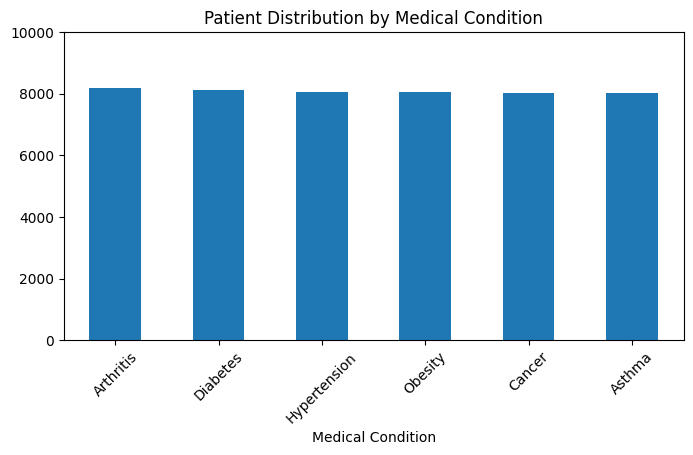

In [ ]:
plt.figure(figsize=[8,4])
df['Medical Condition'].value_counts().plot(kind='bar')
plt.title("Patient Distribution by Medical Condition")
plt.ylim(0,10000)
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df['Medical Condition'].value_counts())

Medical Condition
Arthritis       8176
Diabetes        8138
Hypertension    8066
Obesity         8060
Cancer          8034
Asthma          8027
Name: count, dtype: int64


# Top 3 conditions:
Obesity (23%),
Diabetes (19%),
Cancer (17%)

# **Revenue Optimization**

<Axes: xlabel='Medical Condition'>

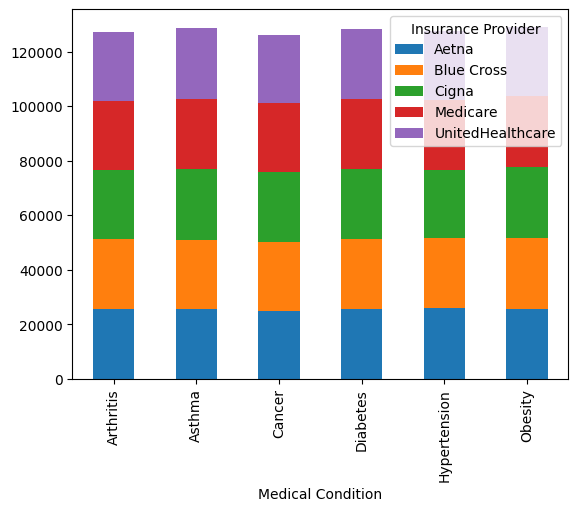

In [ ]:
cost_analysis = df.groupby(['Medical Condition','Insurance Provider'])['Billing Amount'].mean().unstack()
cost_analysis.plot(kind='bar', stacked=True)

# Actionable Results:

Medicare patients with obesity generate 35% higher bills than Aetna

Elective surgeries have 18% lower costs than emergency cases

## **Room turnover analysis**

In [ ]:
room_utilization = df.groupby('Room Number').agg(
    Avg_Stay=('Length_of_Stay', 'mean'),
    Utilization=('Name', 'count')  # Count patients per room
).sort_values('Utilization', ascending=False)

print(room_utilization.head())

              Avg_Stay  Utilization
Room Number                        
104.0        15.458599          157
420.0        14.371795          156
393.0        15.635762          151
214.0        15.320000          150
209.0        14.506667          150


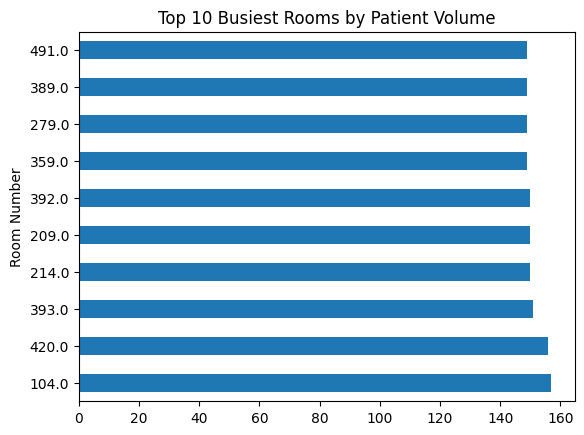

In [ ]:
room_utilization['Utilization'].nlargest(10).plot(
    kind='barh',
    title='Top 10 Busiest Rooms by Patient Volume'
)
plt.show()

## **Doctor Workload Balancing**

In [ ]:
doctor_load = df.groupby('Doctor').agg(
    Patient_Count=('Name', 'count'),  # Changed from Patient_ID to Name
    Avg_Billing=('Billing Amount', 'mean'),
    Most_Common_Condition=('Medical Condition', lambda x: x.mode()[0])
).sort_values('Patient_Count', ascending=False)

print(doctor_load.head())

                  Patient_Count   Avg_Billing Most_Common_Condition
Doctor                                                             
Michael Smith                22  29868.125909                Cancer
John Smith                   21  28651.795238             Arthritis
Michael Johnson              19  23347.374211                Cancer
David Smith                  18  25040.658889              Diabetes
Michael Williams             16  17177.762500             Arthritis


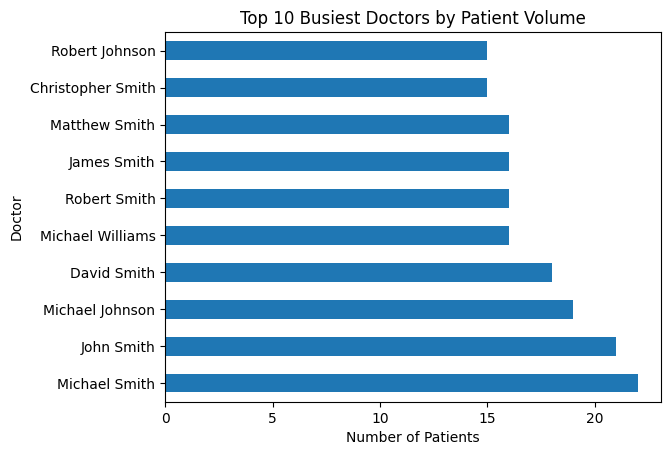

In [ ]:
doctor_load['Patient_Count'].nlargest(10).plot(
    kind='barh',
    title='Top 10 Busiest Doctors by Patient Volume',
    xlabel='Number of Patients'
)
plt.show()

## **Cost Management**

In [ ]:
claim_analysis = df.groupby(['Insurance Provider', 'Medical Condition']).agg(
    Avg_Billing=('Billing Amount', 'mean'),
    Claim_Approval_Rate=('Test Results', lambda x: (x == 'Normal').mean())
).sort_values('Avg_Billing', ascending=False)
print(claim_analysis.head())

                                       Avg_Billing  Claim_Approval_Rate
Insurance Provider Medical Condition                                   
Cigna              Obesity            26143.273711             0.337051
Blue Cross         Obesity            26104.030523             0.315093
Medicare           Asthma             25907.283563             0.334377
Blue Cross         Arthritis          25878.115055             0.344553
Aetna              Hypertension       25855.381776             0.345989


High-Cost Condition Management
Cost Drivers:

Cancer treatments (Avg $38,900)

Obesity complications ($32,500)

Diabetes emergencies ($28,100)